# EDA for the Blog os Vinhos data and rating prediction

In [3]:
#Let's ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
#Libraries import
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import math

In [40]:
#Reading our dataset
df = pd.read_csv('/kaggle/input/portuguese-wines-blog-os-vinhos/PortugueseWines.csv')
df.head(3)

,Unnamed: 0,Name,Region,Year,Color,Castes,AlcoholPercentage,Producer,MinimunPrice,MaximumPrice,Judge,JudgeRating,Date,JudgeNotes,Label,Link
0,0,.Beb,Regional Alentejo,2007,Rosé,"Cabernet Sauvignon, Syrah e Touriga Nacional",13.5,Tiago Mateus Cabaço e Cabaço,4.0,7.5,Tiago Cabaço,15.5,Dezembro 2008,Cor vermelha brilhante e aromas iniciais domin...,Tem uma cor atraente e um aroma intenso a frut...,https://osvinhos.blogspot.pt/2010/03/1232-beb-...
1,1,.Beb,Regional Alentejo,2009,Red,"Cabernet Sauvignon, Syrah, Alicante Bouschet e...",14.0,Tiago Mateus Cabaço e Cabaço,7.5,10.0,Susana Esteban,16.0,Novembro 2012,"Cor avermelhada e nariz muito aromático, onde ...",A escolha criteriosa das melhores parcelas das...,https://osvinhos.blogspot.pt/2013/08/2803-beb-...
2,2,.Beb,Regional Alentejo,2010,Red,"Cabernet Sauvignon, Syrah, Alicante Bouschet e...",14.0,Tiago Mateus Cabaço e Cabaço,7.5,10.0,Tiago Cabaço,16.0,Agosto 2013,Apresenta uma cor rubi agradavelmente concentr...,A escolha criteriosa das melhores parcelas das...,https://osvinhos.blogspot.pt/2014/01/2988-beb-...


In [41]:
df.describe()


,Unnamed: 0,Year,AlcoholPercentage,MinimunPrice,MaximumPrice,JudgeRating
count,2993.000000,2993.000000,2993.000000,2993.000000,2993.000000,2993.000000
mean,1496.000000,2000.924156,13.405112,9.657701,14.688573,15.639492
std,864.149003,127.122885,0.939524,8.548043,40.881400,1.130448
min,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,748.000000,2005.000000,13.000000,4.000000,7.500000,15.000000
50%,1496.000000,2009.000000,13.500000,7.500000,10.000000,15.500000
75%,2244.000000,2013.000000,14.000000,12.500000,15.000000,16.500000
max,2992.000000,2018.000000,17.000000,155.000000,2150.000000,19.000000


In [42]:
#Let's see if we have missing values
df.isnull().values.any()

True

In [43]:
#Let's see if we have missing values
df.isna().sum()

Unnamed: 0            0
Name                  0
Region                4
Year                  0
Color                 0
Castes                4
AlcoholPercentage     0
Producer              0
MinimunPrice          0
MaximumPrice          0
Judge                 0
JudgeRating           0
Date                 23
JudgeNotes            1
Label                 1
Link                  0
dtype: int64

So we have 4 entries with missing region, 4 with missing grapes' type - these two are sad, we can use this features in the analysis
We also don't have 23 dates missing - it's not critical and 1 Lable missing - also nothing too bad.

_____________________________________________________

In [44]:
#For easier representation
#'Name', 'Region', 'Alcohol Percentage' are better to be categorical and 
#'Year','AlcoholPercentage','MinimunPrice','MaximumPrice','JudgeRating' - float. 
cols = ['Name','Region','AlcoholPercentage']
for col in cols:
    df[col] = pd.Categorical(df[col])
cols = ['Year','AlcoholPercentage','MinimunPrice','MaximumPrice','JudgeRating']
for col in cols:
    df[col] = df[col].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2993 entries, 0 to 2992
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Unnamed: 0         2993 non-null   int64   
 1   Name               2993 non-null   category
 2   Region             2989 non-null   category
 3   Year               2993 non-null   float64 
 4   Color              2993 non-null   object  
 5   Castes             2989 non-null   object  
 6   AlcoholPercentage  2993 non-null   float64 
 7   Producer           2993 non-null   object  
 8   MinimunPrice       2993 non-null   float64 
 9   MaximumPrice       2993 non-null   float64 
 10  Judge              2993 non-null   object  
 11  JudgeRating        2993 non-null   float64 
 12  Date               2970 non-null   object  
 13  JudgeNotes         2992 non-null   object  
 14  Label              2992 non-null   object  
 15  Link               2993 non-null   object  
dtypes: cat

In [45]:
#It will be interesting to look at numerical data. 
data = df[['Year','AlcoholPercentage','MinimunPrice','MaximumPrice','JudgeRating','Color']]

In [46]:
data['MinimunPrice'].value_counts()

MinimunPrice
 4.0      699
 7.5      690
 10.0     373
 2.0      325
 12.5     271
 15.0     269
 25.0     165
 20.0     151
 50.0      22
-1.0       18
 75.0       6
 100.0      3
 155.0      1
Name: count, dtype: int64

In [47]:
data['MaximumPrice'].value_counts()

MaximumPrice
 7.5       698
 10.0      690
 12.5      373
 4.0       325
 20.0      270
 15.0      270
 50.0      166
 25.0      151
 75.0       22
 2.0        18
 100.0       5
-1.0         3
 2150.0      1
 7.4         1
Name: count, dtype: int64

In [48]:
data['Year'].value_counts()

Year
 2007.0    239
 2008.0    229
 2011.0    228
 2005.0    226
 2009.0    225
 2013.0    202
 2010.0    199
 2012.0    194
 2004.0    190
 2014.0    185
 2015.0    166
 2006.0    156
 2003.0    139
 2016.0    125
 2017.0     74
 2001.0     63
 2002.0     56
 2000.0     27
 1999.0     24
 2018.0     15
-1.0        12
 1997.0      4
 1985.0      2
 1995.0      2
 1996.0      2
 1998.0      1
 1975.0      1
 1965.0      1
 1986.0      1
 1994.0      1
 1990.0      1
 1991.0      1
 1967.0      1
 1988.0      1
Name: count, dtype: int64

In [49]:
data['JudgeRating'].value_counts()

JudgeRating
 15.5    726
 16.0    712
 16.5    430
 15.0    348
 17.0    257
 14.5    208
 14.0     99
 13.5     72
 17.5     61
 13.0     35
 12.5     13
 18.0     13
 12.0      9
 0.0       3
 11.5      3
 18.5      1
 19.0      1
-1.0       1
 8.0       1
Name: count, dtype: int64

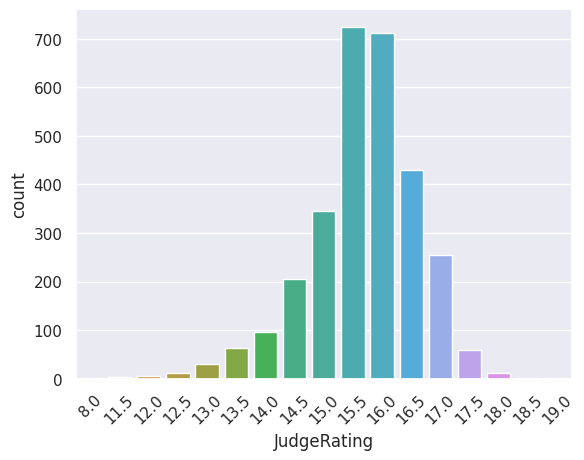

In [55]:
sns.countplot(x="JudgeRating",data=data)
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='JudgeRating', ylabel='Density'>

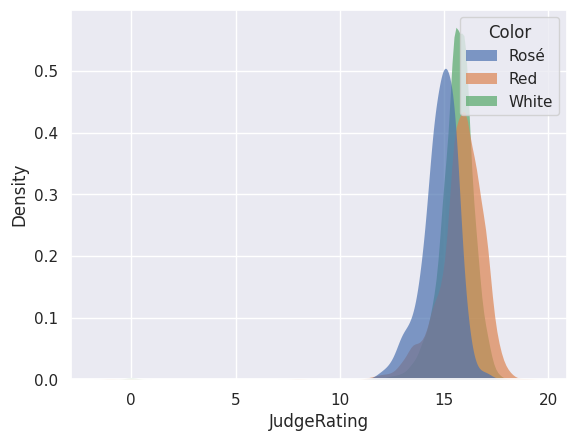

In [50]:
sns.kdeplot(data, x="JudgeRating", hue="Color",fill=True, common_norm=False, 
   alpha=.7, linewidth=0)

In [51]:
data = data[(data['MaximumPrice']<2000) & (data['MaximumPrice']>-1)]
data = data[data['MinimunPrice']>-1]
data = data[data['Year']>0]
data = data[data['JudgeRating']>0]

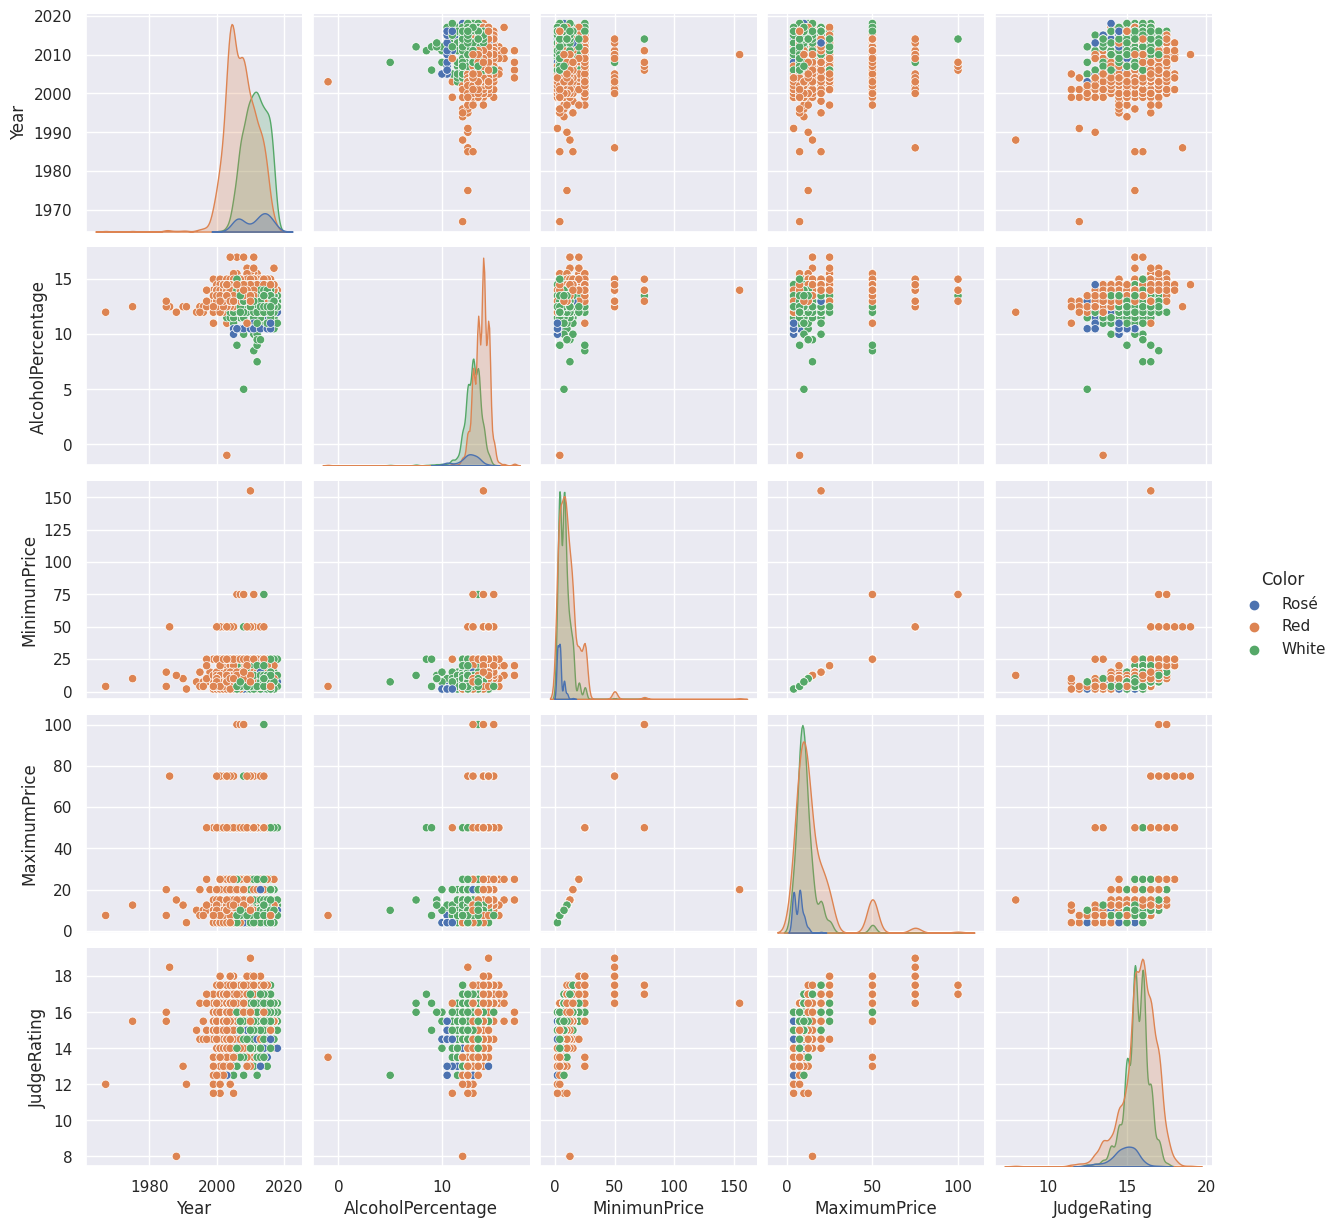

In [52]:
sns.pairplot(data,hue = 'Color')
plt.show()

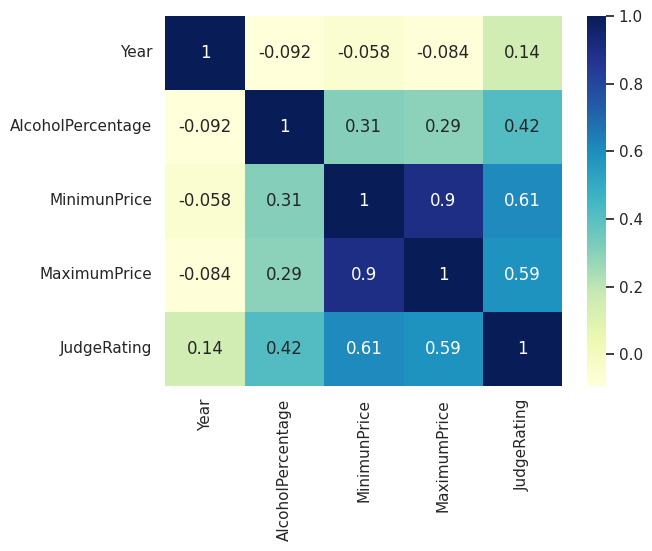

In [53]:
#Let's create a correlation matrix for numerical values and see 
#what is Rating mostly influenced by
dataplot = sns.heatmap(data[['Year','AlcoholPercentage','MinimunPrice','MaximumPrice','JudgeRating']].corr(), cmap="YlGnBu", annot=True)
#Don't incluse 'Color' as it's not numerical

So, th connection of rating is with Min and Max Price and Alcohol % is pretty strong. It will be interesting to look at the charts

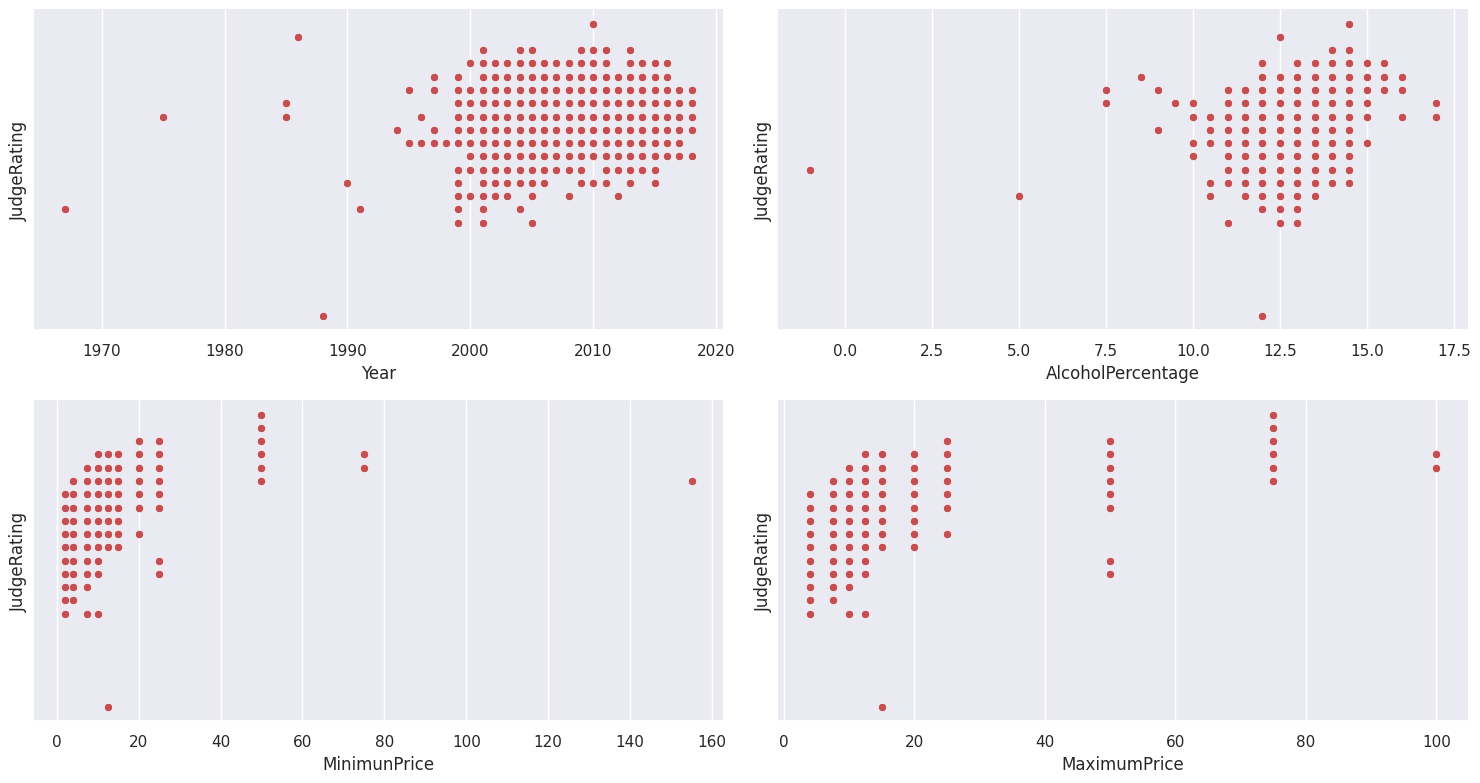

In [54]:
f, axes = plt.subplots(2, 2, figsize=(15, 8))
sns.despine(left=True)

#Plot a histogram and kernel density estimate
cols = ['Year','AlcoholPercentage','MinimunPrice','MaximumPrice']

i = 0
for col in cols: 
    
    sns.scatterplot(x = cols[i], y = 'JudgeRating', data = data, color="r",ax=axes[i//2,i%2])
    i += 1

plt.setp(axes, yticks=[])
plt.tight_layout()

______________________________________________________

Let's create new features based on the grapes' type. 

In [57]:
grapes = df.Castes
grapes = grapes.dropna().unique()
grapes

array(['Cabernet Sauvignon, Syrah e Touriga Nacional',
       'Cabernet Sauvignon, Syrah, Alicante Bouschet e Touriga Nacional',
       'Arinto, Roupeiro e Viognier', ...,
       'Rabigato, Viosinho, Verdelho, Códega do Larinho',
       'Touriga Nacional, Tinto Cão, Tinta Roriz e Touriga Franca',
       'Rabigato, Gouveio, Síria e Arinto'], dtype=object)

In [101]:
df.Castes = df.Castes.str.strip()

In [121]:
df['Castes'] = df.Castes.str.replace(' e ',',')
df['Castes'] = df.Castes.str.replace(', ',',')
grapes_data = df[['Name','Castes']]
grapes_data = grapes_data.join(grapes_data['Castes'].str.get_dummies(sep=','))
grapes_data.head(3)

,Name,Castes,-,Alfrocheiro,Alfrocheiro Preto,Alicante Bouchet,Alicante Bouschet,Alicate Bouschet,Alva,Alvarelhão,...,Viozinho,Vital,Viura,Várias,Welschriesling,Xarello,Zinfandel,Zéta,outras,várias
0,.Beb,"Cabernet Sauvignon,Syrah,Touriga Nacional",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,.Beb,"Cabernet Sauvignon,Syrah,Alicante Bouschet,Tou...",0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,.Beb,"Cabernet Sauvignon,Syrah,Alicante Bouschet,Tou...",0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [122]:
cols = grapes_data.columns
cols = cols[2:]

In [125]:
grapes_series = grapes_data[cols].sum()
grapes_series

-                     22
Alfrocheiro          103
Alfrocheiro Preto      8
Alicante Bouchet       2
Alicante Bouschet    359
                    ... 
Xarello                4
Zinfandel              6
Zéta                   1
outras                34
várias                 3
Length: 236, dtype: int64

In [126]:
grapes = pd.DataFrame({'Grape': grapes_series.index, 'Amount': grapes_series.values}).sort_values(by=['Amount'],ascending=False)

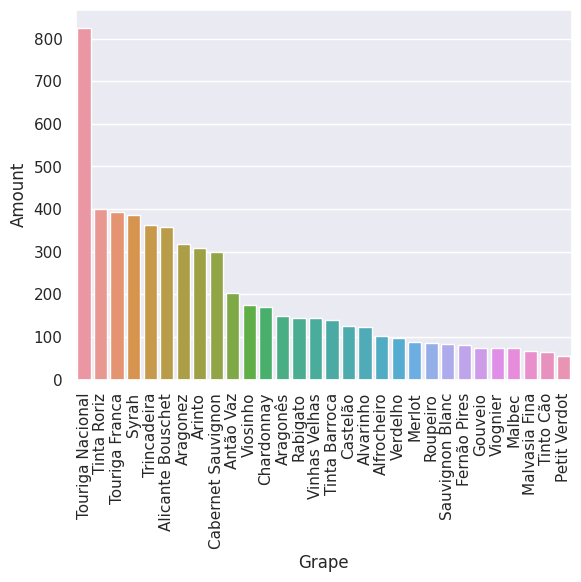

In [127]:
sns.barplot(data=grapes[:30], x="Grape", y="Amount")
plt.xticks(rotation=90)
plt.show()

In [128]:
grapes_data['JudgeRating'] = df['JudgeRating']
grapes_data.head(1)

,Name,Castes,-,Alfrocheiro,Alfrocheiro Preto,Alicante Bouchet,Alicante Bouschet,Alicate Bouschet,Alva,Alvarelhão,...,Vital,Viura,Várias,Welschriesling,Xarello,Zinfandel,Zéta,outras,várias,JudgeRating
0,.Beb,"Cabernet Sauvignon,Syrah,Touriga Nacional",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15.5


-------------------------------------------------------

Region and Producer

In [139]:
df.Region.unique()

['Regional Alentejo', 'Regional Tejo', 'DOC Douro', 'Regional Vinhos Verdes', 'Argentina', ..., 'Mesa Ribatejo', 'DOC Rioja (Espanha)', 'Mesa', 'Brasil', 'França (Saint-Emilion)']
Length: 60
Categories (59, object): ['Alemanha', 'Argentina', 'Austrália', 'Brasil', ..., 'Tunísia', 'Uruguai', 'África do Sul', 'Áustria']

In [140]:
df.Region.value_counts()

Region
Regional Alentejo                687
DOC Douro                        616
DOC Alentejo                     211
Regional Península de Setúbal    180
Espanha                          153
DOC Dão                          128
DOC Vinhos Verdes                102
Argentina                         96
França                            92
Regional Lisboa                   75
Regional Tejo                     53
DOC Bairrada                      50
Chile                             49
Regional Algarve                  46
Regional Ribatejo                 44
Regional Estremadura              43
Regional Beiras                   36
DOC Beiras                        32
Regional Vinhos Verdes            30
Regional Douro                    25
DOC Ribatejo                      19
Nova Zelândia                     19
Alemanha                          18
DOC Tejo                          18
África do Sul                     16
EUA                               15
DOC Trás-os-Montes             

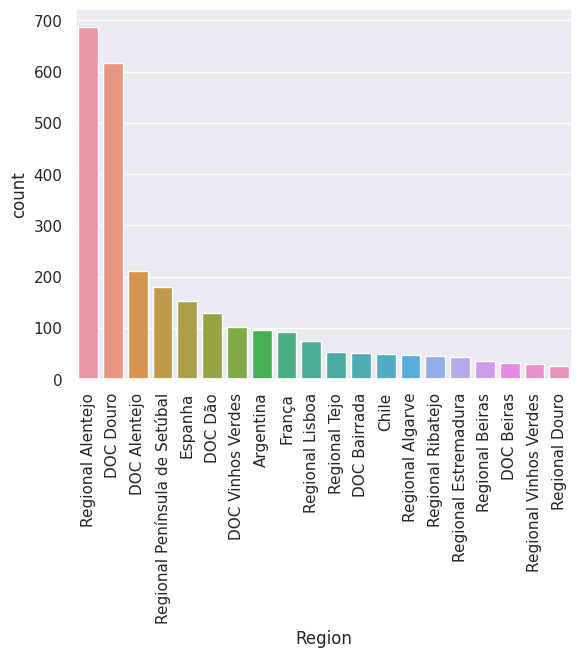

In [141]:
sns.countplot(x="Region",data=df,order=df.Region.value_counts().iloc[:20].index)
plt.xticks(rotation=90)
plt.show()

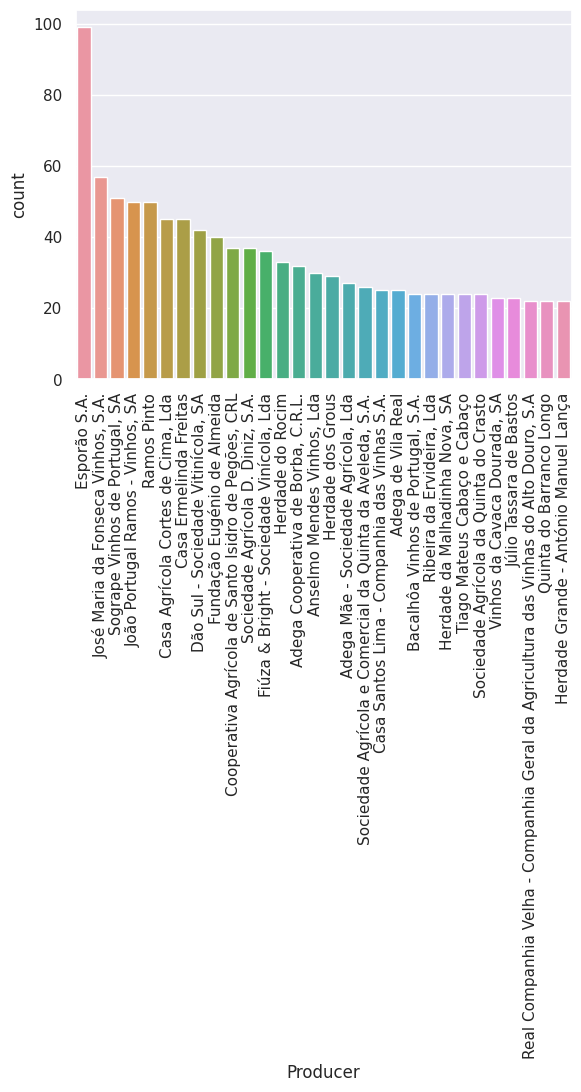

In [143]:
sns.countplot(x="Producer",data=df,order=df.Producer.value_counts().iloc[:30].index)
plt.xticks(rotation=90)
plt.show()

In [144]:
grapes_data.shape

(2993, 239)

In [145]:
df.shape

(2993, 16)

In [146]:
data.shape

(2957, 6)

In [157]:
df = df.merge(grapes_data, how='left')
df = df.drop('Unnamed: 0',axis=1)
df

,Name,Region,Year,Color,Castes,AlcoholPercentage,Producer,MinimunPrice,MaximumPrice,Judge,...,Viozinho,Vital,Viura,Várias,Welschriesling,Xarello,Zinfandel,Zéta,outras,várias
0,.Beb,Regional Alentejo,2007.0,Rosé,"Cabernet Sauvignon,Syrah,Touriga Nacional",13.5,Tiago Mateus Cabaço e Cabaço,4.0,7.5,Tiago Cabaço,...,0,0,0,0,0,0,0,0,0,0
1,.Beb,Regional Alentejo,2009.0,Red,"Cabernet Sauvignon,Syrah,Alicante Bouschet,Tou...",14.0,Tiago Mateus Cabaço e Cabaço,7.5,10.0,Susana Esteban,...,0,0,0,0,0,0,0,0,0,0
2,.Beb,Regional Alentejo,2009.0,Red,"Cabernet Sauvignon,Syrah,Alicante Bouschet,Tou...",14.0,Tiago Mateus Cabaço e Cabaço,7.5,10.0,Susana Esteban,...,0,0,0,0,0,0,0,0,0,0
3,.Beb,Regional Alentejo,2010.0,Red,"Cabernet Sauvignon,Syrah,Alicante Bouschet,Tou...",14.0,Tiago Mateus Cabaço e Cabaço,7.5,10.0,Tiago Cabaço,...,0,0,0,0,0,0,0,0,0,0
4,.Beb,Regional Alentejo,2010.0,Red,"Cabernet Sauvignon,Syrah,Alicante Bouschet,Tou...",14.0,Tiago Mateus Cabaço e Cabaço,7.5,10.0,Tiago Cabaço,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4080,Muxagat,DOC Douro,2005.0,Red,"Touriga Nacional,Tinta Roriz,Touriga Franca",13.0,"Muxagat Vinhos, Lda",10.0,12.5,Mateus Nicolau de Almeida,...,0,0,0,0,0,0,0,0,0,0
4081,Muxagat,DOC Douro,2014.0,White,"Rabigato,Gouveio,Síria,Arinto",13.5,"Muxagat Vinhos, Lda",10.0,12.5,Mateus Nicolau de Almeida,...,0,0,0,0,0,0,0,0,0,0
4082,Muxagat Tinta Barroca,DOC Douro,2010.0,Red,Tinta Barroca,13.0,"Muxagat Vinhos, Lda",7.5,10.0,Mateus Nicolau de Almeida,...,0,0,0,0,0,0,0,0,0,0
4083,Myrtus Reserva Arinto,DOC Estremadura,2007.0,White,Arinto,13.5,Quinta da Murta,7.5,10.0,Nuno Cancela de Abreu e Hugo Mendes,...,0,0,0,0,0,0,0,0,0,0


In [159]:
df.to_csv('data_transformed.csv')

_______________________________________________

___________________________________________________________________________________________

# Rating prediction

In [5]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [6]:
df = pd.read_csv('/kaggle/working/data_transformed.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/working/data_transformed.csv'

In [7]:
df = df.drop(['Castes','Judge','Date','JudgeNotes','Label','Link'],axis = 1)

NameError: name 'df' is not defined

In [186]:
df.head(1)

,Unnamed: 0,Name,Region,Year,Color,AlcoholPercentage,Producer,MinimunPrice,MaximumPrice,JudgeRating,...,Viozinho,Vital,Viura,Várias,Welschriesling,Xarello,Zinfandel,Zéta,outras,várias
0,0,.Beb,Regional Alentejo,2007.0,Rosé,13.5,Tiago Mateus Cabaço e Cabaço,4.0,7.5,15.5,...,0,0,0,0,0,0,0,0,0,0


In [187]:
df = df[(df['MaximumPrice']<2000) & (data['MaximumPrice']>-1)]
df = df[df['MinimunPrice']>-1]
df = df[df['Year']>0]
df = df[df['JudgeRating']>0]

In [188]:
df.Year = df.Year.astype("category")

In [189]:
cols = ['Name','Region','Year','Color','Producer']

In [190]:
encoded = pd.get_dummies(df[cols], dtype=float)
encoded

,Name_.Beb,Name_.Beb Selection,Name_.Com,Name_.Com Premium,Name_100 Hectares,Name_100 Hectares Touriga Nacional,Name_1000 Curvas Chardonnay & Alvarinho,Name_1000 Curvas Oak Chardonnay & Alvarinho,Name_1100 Tempranillo,Name_12 Volts,...,Producer_Weingut Dr. Loosen,Producer_Weingut Göhring,Producer_Weingut Hermann Dönnhoff,Producer_Weingut S. A. Prüm,Producer_Weingüter Geheimrat J. Wegeler GmbH & Co,"Producer_William Smith & Lima, Lda","Producer_Wine & Soul, Lda","Producer_Wine Vision, Lda",Producer_Y.M. a 33190,Producer_Álvaro Castro
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2988,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2989,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2990,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2991,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [191]:
df = df.join(encoded)
df = df.drop(cols,axis = 1)
df.head(1)

,Unnamed: 0,AlcoholPercentage,MinimunPrice,MaximumPrice,JudgeRating,-,Alfrocheiro,Alfrocheiro Preto,Alicante Bouchet,Alicante Bouschet,...,Producer_Weingut Dr. Loosen,Producer_Weingut Göhring,Producer_Weingut Hermann Dönnhoff,Producer_Weingut S. A. Prüm,Producer_Weingüter Geheimrat J. Wegeler GmbH & Co,"Producer_William Smith & Lima, Lda","Producer_Wine & Soul, Lda","Producer_Wine Vision, Lda",Producer_Y.M. a 33190,Producer_Álvaro Castro
0,0,13.5,4.0,7.5,15.5,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [192]:
y = df.JudgeRating

In [207]:
y = y.astype("float")
y

0       15.5
1       16.0
2       16.0
3       16.0
4       16.0
        ... 
2988    15.5
2989    15.5
2990    15.0
2991    15.5
2992    15.5
Name: JudgeRating, Length: 2937, dtype: float64

In [194]:
df = df.drop(['JudgeRating','Unnamed: 0'],axis=1)
df.head(1)

,AlcoholPercentage,MinimunPrice,MaximumPrice,-,Alfrocheiro,Alfrocheiro Preto,Alicante Bouchet,Alicante Bouschet,Alicate Bouschet,Alva,...,Producer_Weingut Dr. Loosen,Producer_Weingut Göhring,Producer_Weingut Hermann Dönnhoff,Producer_Weingut S. A. Prüm,Producer_Weingüter Geheimrat J. Wegeler GmbH & Co,"Producer_William Smith & Lima, Lda","Producer_Wine & Soul, Lda","Producer_Wine Vision, Lda",Producer_Y.M. a 33190,Producer_Álvaro Castro
0,13.5,4.0,7.5,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [195]:
x = df.values 
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)
df

,0,1,2,3,4,5,6,7,8,9,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,0.805556,0.013072,0.084158,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.833333,0.035948,0.108911,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.833333,0.035948,0.108911,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.833333,0.035948,0.108911,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.833333,0.035948,0.108911,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2932,0.777778,0.013072,0.084158,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2933,0.833333,0.035948,0.108911,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2934,0.777778,0.013072,0.084158,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2935,0.777778,0.013072,0.084158,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [205]:
X = df.astype('int')


In [208]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [199]:
from sklearn import tree
from sklearn import metrics

In [213]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_percentage_error, accuracy_score
 
model_SVR = svm.SVR()
model_SVR.fit(X_train,y_train)
Y_pred = model_SVR.predict(X_test)
 
#print(accuracy_score(y_test, Y_pred))
print(model_SVR.score(X_test,y_test))

0.49159063317942375


Well, the result is not too good, literally 50/50. However  from the data provided I would suggest that it's not a lot we can improve as it's very subjective